# Clustering

## 0. Data Prep

In [9]:
# read in the data
import pandas as pd
df = pd.read_csv('entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [10]:
# note the number of rows and columns
df.shape

(150, 4)

In [11]:
# check 1: is the data at the right row granularity? yes, each row is a student
df.name.nunique()

150

In [12]:
# check 2: are the columns non-null?
df[df.isna().any(axis=1)]

,name,books,tv_shows,video_games


In [13]:
# check 3: are the columns numeric?
df.dtypes

name            object
books          float64
tv_shows       float64
video_games    float64
dtype: object

In [14]:
# check 4: engineer new features? not for now.

In [15]:
# check 5: select features? exclude the name column for modeling.
data = df.drop(columns='name')
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [16]:
# check 6: scale features? data is roughly all on a similar scale (for a distance-based calculation)
data.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


In [17]:
# the dataframe is ready for modeling!
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


## 1. Fit a K-Means Model

### i. K-Means Basics

In [18]:
# import kmeans from sklearn
from sklearn.cluster import KMeans

In [19]:
# fit a kmeans model with 2 clusters
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data)

C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=42)

In [20]:
# view the cluster labels
kmeans2.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

### ii. Visualizing K-Means Clustering

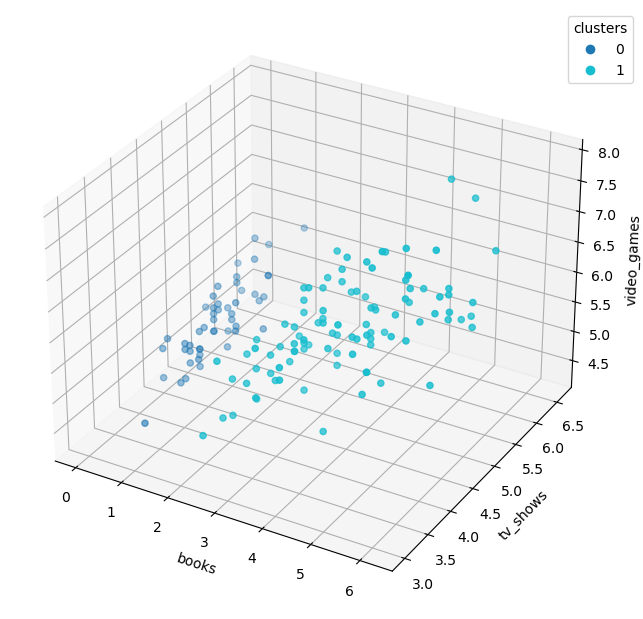

In [21]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# combine the data and cluster labels
cluster_labels = pd.Series(kmeans2.labels_, name='cluster')

# create a clean dataframe
df_clean = pd.concat([data, cluster_labels], axis=1)

# create a 3d scatter plot
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

# specify the data and labels
sc = ax.scatter(df_clean['books'], df_clean['tv_shows'], df_clean['video_games'],
                c=df_clean['cluster'], cmap='tab10')
ax.set_xlabel('books')
ax.set_ylabel('tv_shows')
ax.set_zlabel('video_games')

# add a legend
plt.legend(*sc.legend_elements(), title='clusters',
           bbox_to_anchor=(1.05, 1));

### iii. Interpreting K-Means Clustering

In [22]:
data.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

In [23]:
# view the cluster centers
kmeans2.cluster_centers_

array([[0.596, 5.13 , 5.006],
       [4.192, 4.314, 6.262]])

In [24]:
data.mean()

books          2.993333
tv_shows       4.586000
video_games    5.843333
dtype: float64

Students in **Cluster 1** spend, on average:
* 0.6 hours reading books
* 5.1 hours watching tv shows
* 5 hours playing video games

Students in **Cluster 2** spend, on average:
* 4.2 hours reading books
* 4.3 hours watching tv shows 
* 6.3 hours playing video games

Let's name the clusters:
* Cluster 1: **Non-readers**
* Cluster 2: **Entertainment enthusiasts**

In [25]:
# fit a kmeans model with 3 clusters
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data)

C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [26]:
# view the cluster labels
kmeans3.labels_

array([0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0])

In [27]:
# view the cluster centers
kmeans3.cluster_centers_

array([[0.596     , 5.13      , 5.006     ],
       [5.14375   , 4.52708333, 6.63958333],
       [3.31346154, 4.11730769, 5.91346154]])

In [28]:
# view the cluster centers in a dataframe
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data.columns)
cluster_centers3

,books,tv_shows,video_games
0,0.596000,5.130000,5.006000
1,5.143750,4.527083,6.639583
2,3.313462,4.117308,5.913462


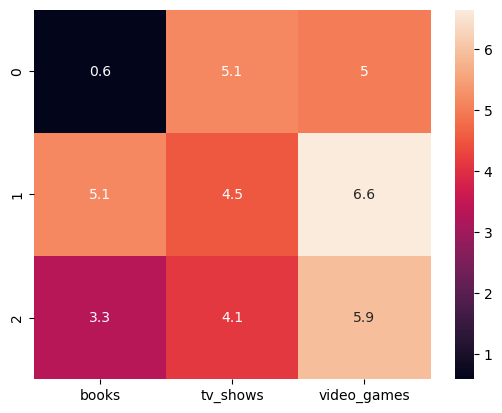

In [30]:
# view the cluster centers in a heatmap
import seaborn as sns
sns.heatmap(cluster_centers3,  annot=True);

Name the clusters:

* Cluster 0: **Non-readers**
* Cluster 1: **Entertainment enthusiasts**
* Cluster 2: **Prefer video games to books**

## 2. Inertia Plot

In [31]:
# view previous inertia values
kmeans2.inertia_, kmeans3.inertia_

(206.442, 105.47568525641029)

In [32]:
# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

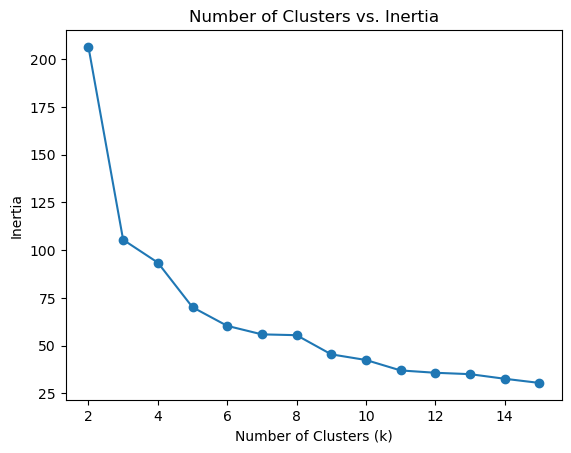

In [33]:
# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

**Insight from the inertia plot**: 3 and 5 clusters both seem to be elbows - let's dive into both of them

Remember our 3 clusters:

* Cluster 0: **Non-readers**
* Cluster 1: **Entertainment enthusiasts**
* Cluster 2: **Prefer video games to books**

In [34]:
# now for 5 clusters
kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans5.fit(data)

C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, n_init='auto', random_state=42)

In [35]:
# view the cluster centers in a dataframe
cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=data.columns)
cluster_centers5

,books,tv_shows,video_games
0,0.685714,5.814286,5.378571
1,4.148718,4.392308,6.335897
2,3.087879,3.909091,5.657576
3,0.561111,4.863889,4.861111
4,5.553571,4.682143,6.871429


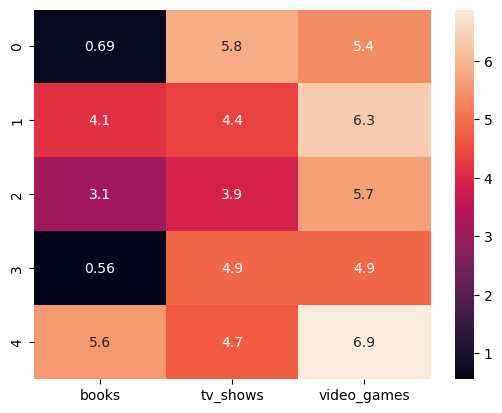

In [37]:
# view the cluster centers in a heatmap
sns.heatmap(cluster_centers5,annot=True);

A lot of the clusters are similar, and we could potentially combine some clusters together (note: this would give us a different result than if we did 3 clusters).

**Conclusion**: 3 clusters seem to capture patterns in the data, without being too complex. This is our best model for now.

Remember our 3 clusters:

* Cluster 0: **Non-readers**
* Cluster 1: **Entertainment enthusiasts**
* Cluster 2: **Prefer video games to books**

## 3. Tune the K-Means Model

In [38]:
# read in the prepped data (engineered and standardized features) from the last section
data_v2 = pd.read_pickle('../Data/entertainment_data_for_modeling.pkl')
data_v2.head()

entertainment,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-1.360056,1.384262
1,-0.294884,-1.551591,1.918235
2,-0.294884,-1.336114,1.388865
3,-0.294884,0.435582,-0.344126
4,-0.294884,-0.258731,-0.217658


In [39]:
# create 2 - 15 clusters, and add the inertia scores to the list
inertia_values_v2 = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_v2)
    inertia_values_v2.append(kmeans.inertia_)

C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

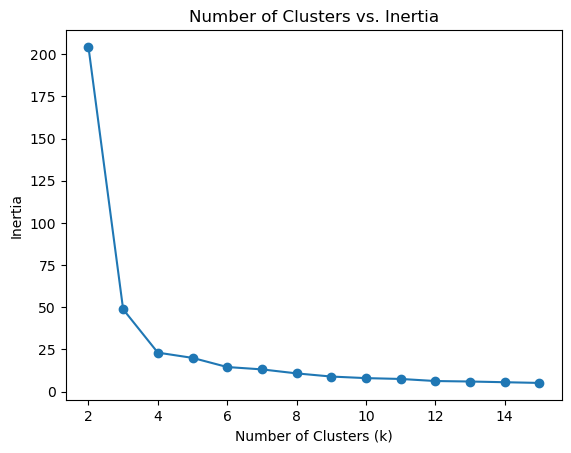

In [40]:
# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series_v2 = pd.Series(inertia_values_v2, index=range(2, 16))

# plot the data
inertia_series_v2.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [41]:
# let's try 4 clusters
kmeans4 = KMeans(n_clusters=4, n_init='auto', random_state=42)
kmeans4.fit(data_v2)

C:\Users\zbrhs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=42)

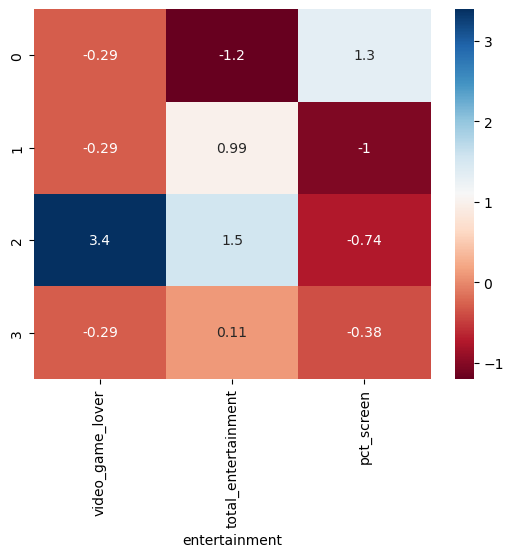

In [42]:
# view the cluster centers in a heatmap
cluster_centers4_v2 = pd.DataFrame(kmeans4.cluster_centers_, columns=data_v2.columns)
sns.heatmap(cluster_centers4_v2, cmap='RdBu', annot=True);

Name the clusters:

* Cluster 0: **Less entertainment, especially books**
* Cluster 1: **Prefer books to screens**
* Cluster 2: **Entertainment enthusiasts, especially video games**
* Cluster 3: **Typical students**

In [43]:
# view some students from cluster 0 - few books
data[kmeans4.labels_==0].head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
8,0.0,4.6,4.9
11,0.5,4.8,4.7


In [44]:
# view some students from cluster 2 - lots of video games
data[kmeans4.labels_==2].head()

,books,tv_shows,video_games
19,5.8,3.9,7.7
29,6.2,5.4,7.2
31,4.5,4.4,7.3
49,5.0,4.2,7.7
50,5.2,4.5,7.1


## 4. Select the Best K-Means Model

### a. Comparing cluster assignments

The three clusters created from the original data set (books, tv_shows, movies):
* Cluster 0: **Non-readers**
* Cluster 1: **Entertainment enthusiasts**
* Cluster 2: **Prefer video games to books**

The four clusters created from the updated data set (video_game_lover, total_entertainmnet, pct_screen):
* Cluster 0: **Less entertainment, especially books**
* Cluster 1: **Prefer books to screens**
* Cluster 2: **Entertainment enthusiasts, especially video games**
* Cluster 3: **Typical students**

In [45]:
# model 1: assign the cluster name to each row
model1_clusters = pd.Series(kmeans3.labels_, name='model1_clusters')
model1_names = model1_clusters.map({0: 'Non-Readers',
                                    1: 'Entertainment Enthusiasts',
                                    2: 'Prefer Video Games to Books'})
model1_names.head()

0                    Non-Readers
1                    Non-Readers
2                    Non-Readers
3    Prefer Video Games to Books
4    Prefer Video Games to Books
Name: model1_clusters, dtype: object

In [46]:
# view the number of students in each cluster for model 1
model1_names.value_counts()

model1_clusters
Prefer Video Games to Books    52
Non-Readers                    50
Entertainment Enthusiasts      48
Name: count, dtype: int64

In [47]:
# model 2: assign the cluster name to each row
model2_clusters = pd.Series(kmeans4.labels_, name='model2_clusters')
model2_names = model2_clusters.map({0: 'Less Entertainment (Few Books)',
                                    1: 'Prefer Books to Screens',
                                    2: 'Entertainment Enthusiasts (Many Video Games)',
                                    3: 'Typical Students'})
model2_names.head()

0    Less Entertainment (Few Books)
1    Less Entertainment (Few Books)
2    Less Entertainment (Few Books)
3                  Typical Students
4                  Typical Students
Name: model2_clusters, dtype: object

In [41]:
# view the number of students in each cluster for model 2
model2_names.value_counts()

model2_clusters
Typical Students                                52
Less Entertainment (Few Books)                  50
Prefer Books to Screens                         36
Entertainment Enthusiasts (Many Video Games)    12
Name: count, dtype: int64

**Conclusion**: The first model seems to split the students into evenly-sized clusters, while the second model seems to label more students as typical, and then fewer as -books, -screens or +video games. Depending on what our goal is, we would pick the model that fits the goal.

### b. Comparing individual rows within the clusters

In [42]:
# combine the cluster names with the original data set
cluster_names = pd.concat([df, model1_names, model2_names], axis=1)
cluster_names.head()

,name,books,tv_shows,video_games,model1_clusters,model2_clusters
0,Aaliyah,0.5,4.6,4.9,Non-Readers,Less Entertainment (Few Books)
1,Abigail,0.0,4.5,4.8,Non-Readers,Less Entertainment (Few Books)
2,Addison,0.5,4.5,5.0,Non-Readers,Less Entertainment (Few Books)
3,Adeline,3.5,4.5,6.6,Prefer Video Games to Books,Typical Students
4,Alana,2.8,3.8,5.6,Prefer Video Games to Books,Typical Students


In [43]:
# compare the cluster assignments and means of both models - find the unique combos of differences
(cluster_names.groupby(['model1_clusters', 'model2_clusters'])
                      [['books', 'tv_shows', 'video_games']]
               .mean())

books  \
model1_clusters             model2_clusters                                          
Entertainment Enthusiasts   Entertainment Enthusiasts (Many Video Games)  5.125000   
                            Prefer Books to Screens                       5.150000   
Non-Readers                 Less Entertainment (Few Books)                0.596000   
Prefer Video Games to Books Typical Students                              3.313462   

                                                                          tv_shows  \
model1_clusters             model2_clusters                                          
Entertainment Enthusiasts   Entertainment Enthusiasts (Many Video Games)  4.691667   
                            Prefer Books to Screens                       4.472222   
Non-Readers                 Less Entertainment (Few Books)                5.130000   
Prefer Video Games to Books Typical Students                              4.117308   

                                                                          video_games  
model1_clusters             model2_clusters                                            
Entertainment Enthusiasts   Entertainment Enthusiasts (Many Video Games)     7.475000  
                            Prefer Books to Screens                          6.361111  
Non-Readers                 Less Entertainment (Few Books)                   5.006000  
Prefer Video Games to Books Typical Students                                 5.913462

**Conclusion**: Looking at what model 1 called "enthusiasts", there isn't a huge difference between model 2's "enthusiast" and "less screens" labels.

### c. Remembering the original goal

**Goal**: The local library is starting an initiative to encourage teenagers to read more, and would like to market it differently to various segments of teenagers 

**Model 1**:
* Cluster 0: **Non-readers** (50)
* Cluster 1: **Entertainment enthusiasts** (48)
* Cluster 2: **Prefer video games to books** (52)
    
**Model 2**:
* Cluster 0: **Less entertainment, especially books** (50)
* Cluster 1: **Less screens** (36)
* Cluster 2: **Entertainment enthusiasts, especially video games** (12)
* Cluster 3: **Typical students** (52)